Q.3 Suyash Mali Clustering

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
customerspends_df = pd.read_csv( "https://raw.githubusercontent.com/rssmahesh1/MLAP2021Exam/main/MALP2021%20Question%20paper/customerspends.csv")

In [3]:
customerspends_df.head(5)

,Customer,Apparel,Beauty and Healthcare
0,1,21.10,0.7
1,2,15.23,5.5
2,3,5.22,18.6
3,4,31.10,1.8
4,5,6.12,21.5


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

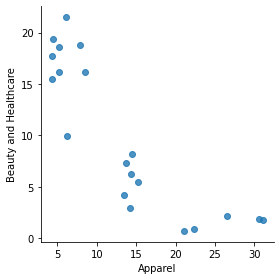

In [5]:
sn.lmplot( "Apparel", "Beauty and Healthcare", data=customerspends_df, fit_reg = False, size = 4 );



Looking at the previous graph we can conclude that there are 4 clusters present in the given dataset

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
scaled_customerspends_df = scaler.fit_transform(
  customerspends_df[["Apparel", "Beauty and Healthcare"]] )
scaled_customerspends_df[0:5]

array([[ 0.892371  , -1.26688022],
       [ 0.20647107, -0.59775334],
       [-0.96318111,  1.22840542],
       [ 2.06085469, -1.11353864],
       [-0.85801758,  1.63266957]])

In [8]:
from sklearn.cluster import KMeans
clusters_new = KMeans( 4, random_state=42 )
clusters_new.fit( scaled_customerspends_df )
customerspends_df["clusterid_new"] = clusters_new.labels_

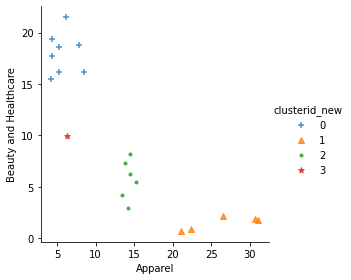

In [9]:
markers = ['+','^','.','*']
sn.lmplot( "Apparel", "Beauty and Healthcare",
data=customerspends_df,
hue = "clusterid_new",
fit_reg=False,
markers = markers,
size = 4 );

Customer segments created after normalization

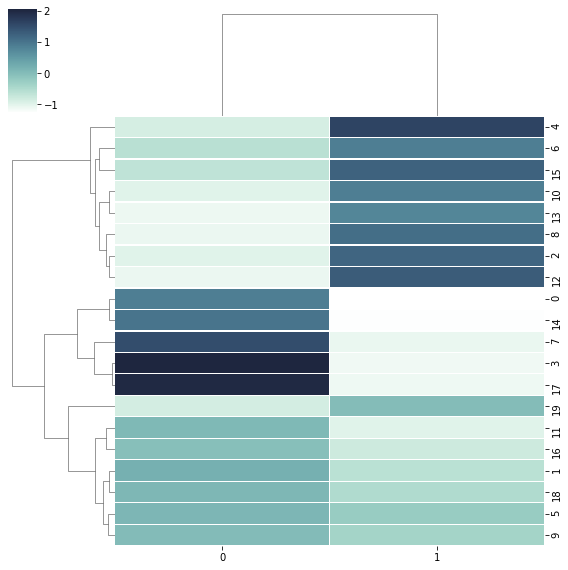

In [10]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(scaled_customerspends_df, cmap=cmap, linewidths=.2,
              figsize = (8,8) );

Using dendogram we can see that there are 4 clusters forming.

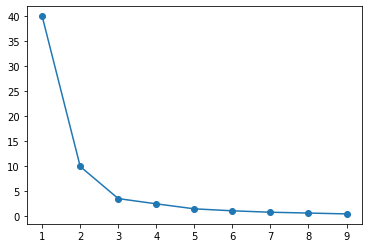

In [11]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( scaled_customerspends_df )
  cluster_errors.append( clusters.inertia_ )

plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );

C. Yes, both the dendogram and elbow method showing the same number of clusters.

In [12]:
scaler = StandardScaler()
scaled_customerspends_df = scaler.fit_transform( customerspends_df[['Apparel',
                                                'Beauty and Healthcare']] )

In [13]:
k = 4
clusters = KMeans( k, random_state = 42 )
clusters.fit( scaled_customerspends_df )
customerspends_df["clusterid"] = clusters.labels_

In [14]:
customerspends_df[customerspends_df.clusterid == 0]

,Customer,Apparel,Beauty and Healthcare,clusterid_new,clusterid
2,3,5.22,18.6,0,0
4,5,6.12,21.5,0,0
6,7,8.50,16.2,0,0
8,9,4.34,17.7,0,0
10,11,5.20,16.2,0,0
12,13,4.40,19.4,0,0
13,14,4.25,15.5,0,0
15,16,7.90,18.8,0,0


In [15]:
customerspends_df[customerspends_df.clusterid == 1]

,Customer,Apparel,Beauty and Healthcare,clusterid_new,clusterid
0,1,21.1,0.7,1,1
3,4,31.1,1.8,1,1
7,8,26.5,2.2,1,1
14,15,22.3,0.9,1,1
17,18,30.6,1.9,1,1


In [16]:
customerspends_df[customerspends_df.clusterid == 2]

,Customer,Apparel,Beauty and Healthcare,clusterid_new,clusterid
1,2,15.23,5.50,2,2
5,6,14.50,8.20,2,2
9,10,13.75,7.30,2,2
11,12,14.20,2.90,2,2
16,17,13.40,4.20,2,2
18,19,14.40,6.28,2,2


In [17]:
customerspends_df[customerspends_df.clusterid == 3]

,Customer,Apparel,Beauty and Healthcare,clusterid_new,clusterid
19,20,6.25,9.98,3,3
